## MTurk I/O for Image Dataset

The query of interest is: **The outlined boxes depict a person riding a bike** 

Want to generate the input .csv file for MTurk and parse the output csv file for results. Using MTurkHelper from babble with adjustments for candidate type.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

import os
import sys
sys.path.append('/dfs/scratch0/paroma/coco')
sys.path.append('/dfs/scratch0/paroma/coco/PythonAPI/')

from pycocotools.coco import COCO
import skimage.io as io
import pylab
import cv2

import pandas as pd

## Generate Input CSV
Load the necessary data for this task and write out variables in the form:

`<img class="img-responsive center-block" src="http://paroma.github.io/turk_images/train_IDX_PIDX_BIDX.png" />`

In [2]:
vg_folder = '/dfs/scratch0/paroma/visual_genome/'
train_mscoco = np.load(vg_folder+'train_mscoco.npy')
val_mscoco = np.load(vg_folder+'val_mscoco.npy')

train_ground = np.load(vg_folder+'train_ground.npy')
val_ground = np.load(vg_folder+'val_ground.npy')

In [3]:
#sizes of train-val-test
print "Train Set Size: ", np.shape(train_mscoco)[0], " Positive: ", np.shape(np.where(train_ground == 1))[1] 
print "Val Set Size: ", np.shape(val_mscoco)[0], " Positive: ", np.shape(np.where(val_ground == 1))[1] 

Train Set Size:  903  Positive:  270
Val Set Size:  429  Positive:  86


In [4]:
def generate_anns(filename, coco_ids):
    coco=COCO(filename)
    catIds = coco.getCatIds(catNms=['person','bicycle']);
    set_anns = []

    for set_id in coco_ids:
        annIds = coco.getAnnIds(imgIds=set_id, catIds=catIds, iscrowd=None)
        anns = coco.loadAnns(annIds)

        temp_list = []
        for i in xrange(len(anns)):
            temp_dict = {'category_id':anns[i]['category_id'], 'bbox':anns[i]['bbox']}
            temp_list.append(temp_dict)
        set_anns.append(temp_list)
        
    return set_anns

In [5]:
from pycocotools.coco import COCO
coco_path = '/dfs/scratch0/paroma/coco/annotations/'

train_anns = generate_anns(coco_path+'instances_train2014.json', train_mscoco)
#val_anns = generate_anns(coco_path+'instances_val2014.json', val_mscoco)

loading annotations into memory...
Done (t=20.50s)
creating index...
index created!
loading annotations into memory...
Done (t=10.44s)
creating index...
index created!


## MTurk Helper for Input CSV

In [18]:
sys.path.append('/afs/cs.stanford.edu/u/paroma/snorkel_new/babble_snorkel/tutorials/babble/data/')
from mturk_processing import MTurkHelper
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We want to make "fake" candidates for the visual tesk since it doesn't fit into the actual sense of the word "candidate". They will just be a list of image names that are saved (how convenient!)

In [19]:
filelist= [file for file in os.listdir('/dfs/scratch0/paroma/visual_genome/') if file.endswith('.png')]

In [20]:
helper = MTurkHelper(candidates=filelist, labels=[], num_hits=25)

In [21]:
input_csv_path = './mturk_visual_in.csv'
helper.preprocess_visual(input_csv_path)

Wrote 25 HITs with 4 candidates per HIT


## MTurk Helper for Output CSV

In [22]:
output_csv_path = './mturk_visual_out.csv'

Num HITs unique: 11
Num HITs total: 13


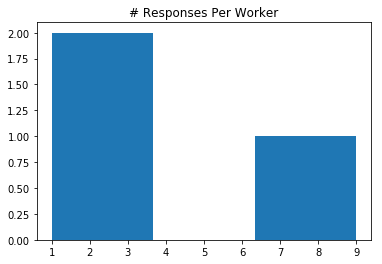

Median # seconds/HIT: 1508 (377.0 s/explanation)


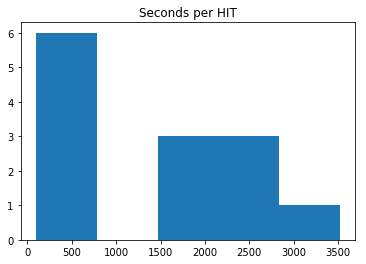

Unanimous: 0
Majority: 0
Split: 0
Bad: 6


In [51]:
from mturk_processing import MTurkHelper
helper = MTurkHelper(candidates=[], labels=[], num_hits=25, domain='vg')
explanations = helper.postprocess_visual(output_csv_path, candidates=[], verbose=True)